<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/RushHour2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import calendar
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)

In [ ]:
rush_hour_index = set()

In [ ]:
for i in range(0,24*60//5):
  hour = int(df.loc[i]["time"][11:13])

  if (8 <= hour <= 9) or (17 <= hour <= 19):
    rush_hour_index.add(i)

In [ ]:
all_index = list()

In [ ]:
for i in range(1,366):
  for j in rush_hour_index:
    all_index.append(i*j)

In [ ]:
x = list()

In [ ]:
for i in all_index:
  x.append(df.loc[i])

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2 = df2.append(x)

In [ ]:
df_corr = df2.corr()

In [ ]:
arr = df_corr.copy()

In [ ]:
arr

,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,drive/MyDrive/2017_v1/880_0_2017.csv,drive/MyDrive/2017_v1/821_1_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
drive/MyDrive/2017_v1/739_1_2017.csv,1.000000,0.413537,0.195281,0.324900,0.580530,0.265346,0.073787,0.330794,0.203491,0.404717,0.307136,0.496927,0.562743,0.195144,0.393015,0.760836,0.255538,0.153933,0.169730,0.591916,0.487626,0.295914,0.103282,0.521721,0.391401,0.206872,0.659446,0.501304,0.527203,0.539200,0.136284,0.056105,0.265820,0.365815,0.416152,-0.050929,0.509508,0.363462,0.346191,-0.234878,...,0.299350,0.225553,0.363180,0.306929,0.330446,0.686797,0.253585,-0.260901,0.350485,0.474343,0.338152,0.430971,0.154349,0.293782,0.199586,-0.028190,0.403257,0.266967,0.113526,0.155577,0.580278,0.368287,-0.036826,0.639982,0.007164,0.627977,0.291502,0.080505,0.646701,0.222889,0.329722,0.198342,0.390371,0.338439,0.584173,0.593474,0.173284,0.270322,0.196947,0.089545
drive/MyDrive/2017_v1/482_1_2017.csv,0.413537,1.000000,0.376771,0.496300,0.570238,0.474228,0.236908,0.549393,0.380609,0.662427,0.542039,0.350773,0.732763,0.281869,0.554737,0.323167,0.427509,0.336702,0.392082,0.373240,0.617381,0.465761,0.206487,0.719591,0.3

In [ ]:
cols = list(arr.columns)

In [ ]:
corr = np.array(arr)

In [ ]:
corr

array([[1.        , 0.41353677, 0.19528071, ..., 0.27032157, 0.19694707,
        0.08954491],
       [0.41353677, 1.        , 0.3767707 , ..., 0.33263828, 0.17972442,
        0.26721301],
       [0.19528071, 0.3767707 , 1.        , ..., 0.4967989 , 0.20919434,
        0.51139681],
       ...,
       [0.27032157, 0.33263828, 0.4967989 , ..., 1.        , 0.20111033,
        0.41087939],
       [0.19694707, 0.17972442, 0.20919434, ..., 0.20111033, 1.        ,
        0.16918083],
       [0.08954491, 0.26721301, 0.51139681, ..., 0.41087939, 0.16918083,
        1.        ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)


In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

3

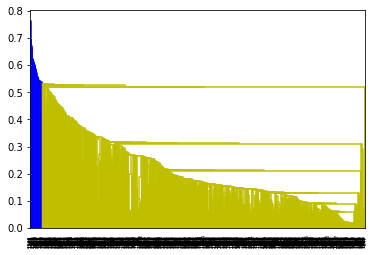

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1464
cluster:3 len:1
cluster:2 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

70

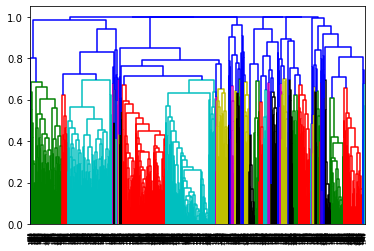

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:4 len:196
cluster:1 len:139
cluster:66 len:26
cluster:16 len:219
cluster:68 len:84
cluster:49 len:28
cluster:37 len:23
cluster:18 len:51
cluster:23 len:1
cluster:67 len:59
cluster:17 len:5
cluster:42 len:28
cluster:15 len:193
cluster:24 len:19
cluster:33 len:25
cluster:40 len:11
cluster:19 len:2
cluster:52 len:55
cluster:51 len:25
cluster:39 len:20
cluster:36 len:21
cluster:26 len:12
cluster:10 len:7
cluster:8 len:4
cluster:58 len:19
cluster:27 len:8
cluster:32 len:3
cluster:69 len:8
cluster:3 len:26
cluster:65 len:1
cluster:60 len:2
cluster:48 len:8
cluster:50 len:18
cluster:57 len:3
cluster:59 len:4
cluster:11 len:7
cluster:56 len:11
cluster:28 len:2
cluster:13 len:6
cluster:62 len:6
cluster:44 len:1
cluster:43 len:2
cluster:63 len:2
cluster:38 len:19
cluster:46 len:2
cluster:22 len:2
cluster:20 len:2
cluster:12 len:2
cluster:5 len:4
cluster:47 len:5
cluster:14 len:2
cluster:54 len:6
cluster:64 len:1
cluster:9 len:3
cluster:21 len:2
cluster:55 len:2
cluster:25 len:7
cluster:4

In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/RushHourCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/RushHourCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

39

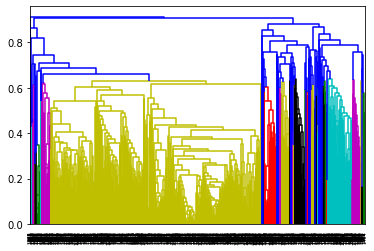

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:16 len:56
cluster:5 len:968
cluster:8 len:61
cluster:34 len:125
cluster:13 len:1
cluster:18 len:14
cluster:11 len:53
cluster:35 len:39
cluster:4 len:23
cluster:24 len:21
cluster:27 len:7
cluster:28 len:1
cluster:37 len:13
cluster:33 len:8
cluster:14 len:5
cluster:36 len:3
cluster:26 len:4
cluster:9 len:2
cluster:3 len:13
cluster:25 len:6
cluster:19 len:1
cluster:17 len:2
cluster:23 len:3
cluster:31 len:9
cluster:12 len:4
cluster:32 len:1
cluster:1 len:4
cluster:7 len:2
cluster:2 len:6
cluster:15 len:2
cluster:20 len:1
cluster:6 len:1
cluster:39 len:1
cluster:22 len:1
cluster:29 len:1
cluster:38 len:1
cluster:21 len:1
cluster:10 len:1
cluster:30 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/RushHourWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/RushHourWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

6

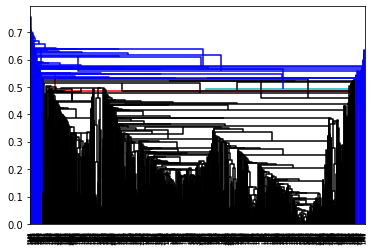

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1461
cluster:2 len:1
cluster:6 len:1
cluster:5 len:1
cluster:3 len:1
cluster:4 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

27

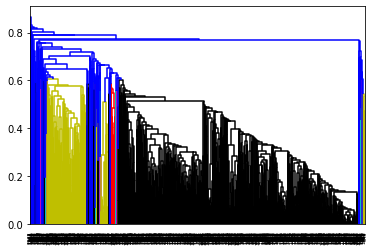

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:17 len:1165
cluster:14 len:206
cluster:18 len:1
cluster:22 len:24
cluster:23 len:1
cluster:8 len:14
cluster:7 len:3
cluster:12 len:4
cluster:10 len:2
cluster:11 len:6
cluster:13 len:4
cluster:5 len:1
cluster:1 len:2
cluster:21 len:3
cluster:15 len:10
cluster:16 len:2
cluster:4 len:4
cluster:9 len:5
cluster:6 len:1
cluster:19 len:1
cluster:27 len:1
cluster:26 len:1
cluster:2 len:1
cluster:25 len:1
cluster:24 len:1
cluster:20 len:1
cluster:3 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/RushHourAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/RushHourAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()